In [11]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from keras.applications.inception_v3 import InceptionV3
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
from io import BytesIO
from PIL import Image

model = models.load_model('modelv2_1.keras')
# print(model.summary())

## Predicción de una imagen

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


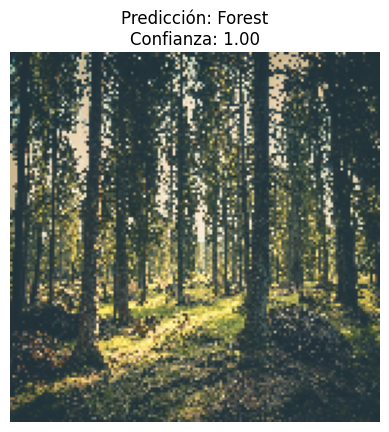

In [5]:
# Diccionario de nombres de clases
class_names = ['Coast', 'Desert', 'Forest', 'Glacier',
               'Mountain'] 

# Carga de imagen
img_path = 'll.jpg'
# Se ajusta el tamaño de acuerdo a la del modelo
img = image.load_img(img_path, target_size=(150, 150))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')

# Preprocesamiento de la imagen
img_array = image.img_to_array(img)
# Añadir una dimensión extra para el batch
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalizar los pixeles

# Predicción
predictions = model.predict(img_array)

# Interpretación de predicción
predicted_class = np.argmax(predictions[0])  # Clase con mayor probabilidad
confidence = predictions[0][predicted_class]  # Confianza de la predicción
# Nombre de la clase predicha
predicted_class_name = class_names[predicted_class]

# Mostrar el nombre de la clase predicha
plt.title("Predicción: {}\nConfianza: {:.2f}".format(
    predicted_class_name, confidence))
plt.show()

## Predicción de imágenes albergadas en una carpeta

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


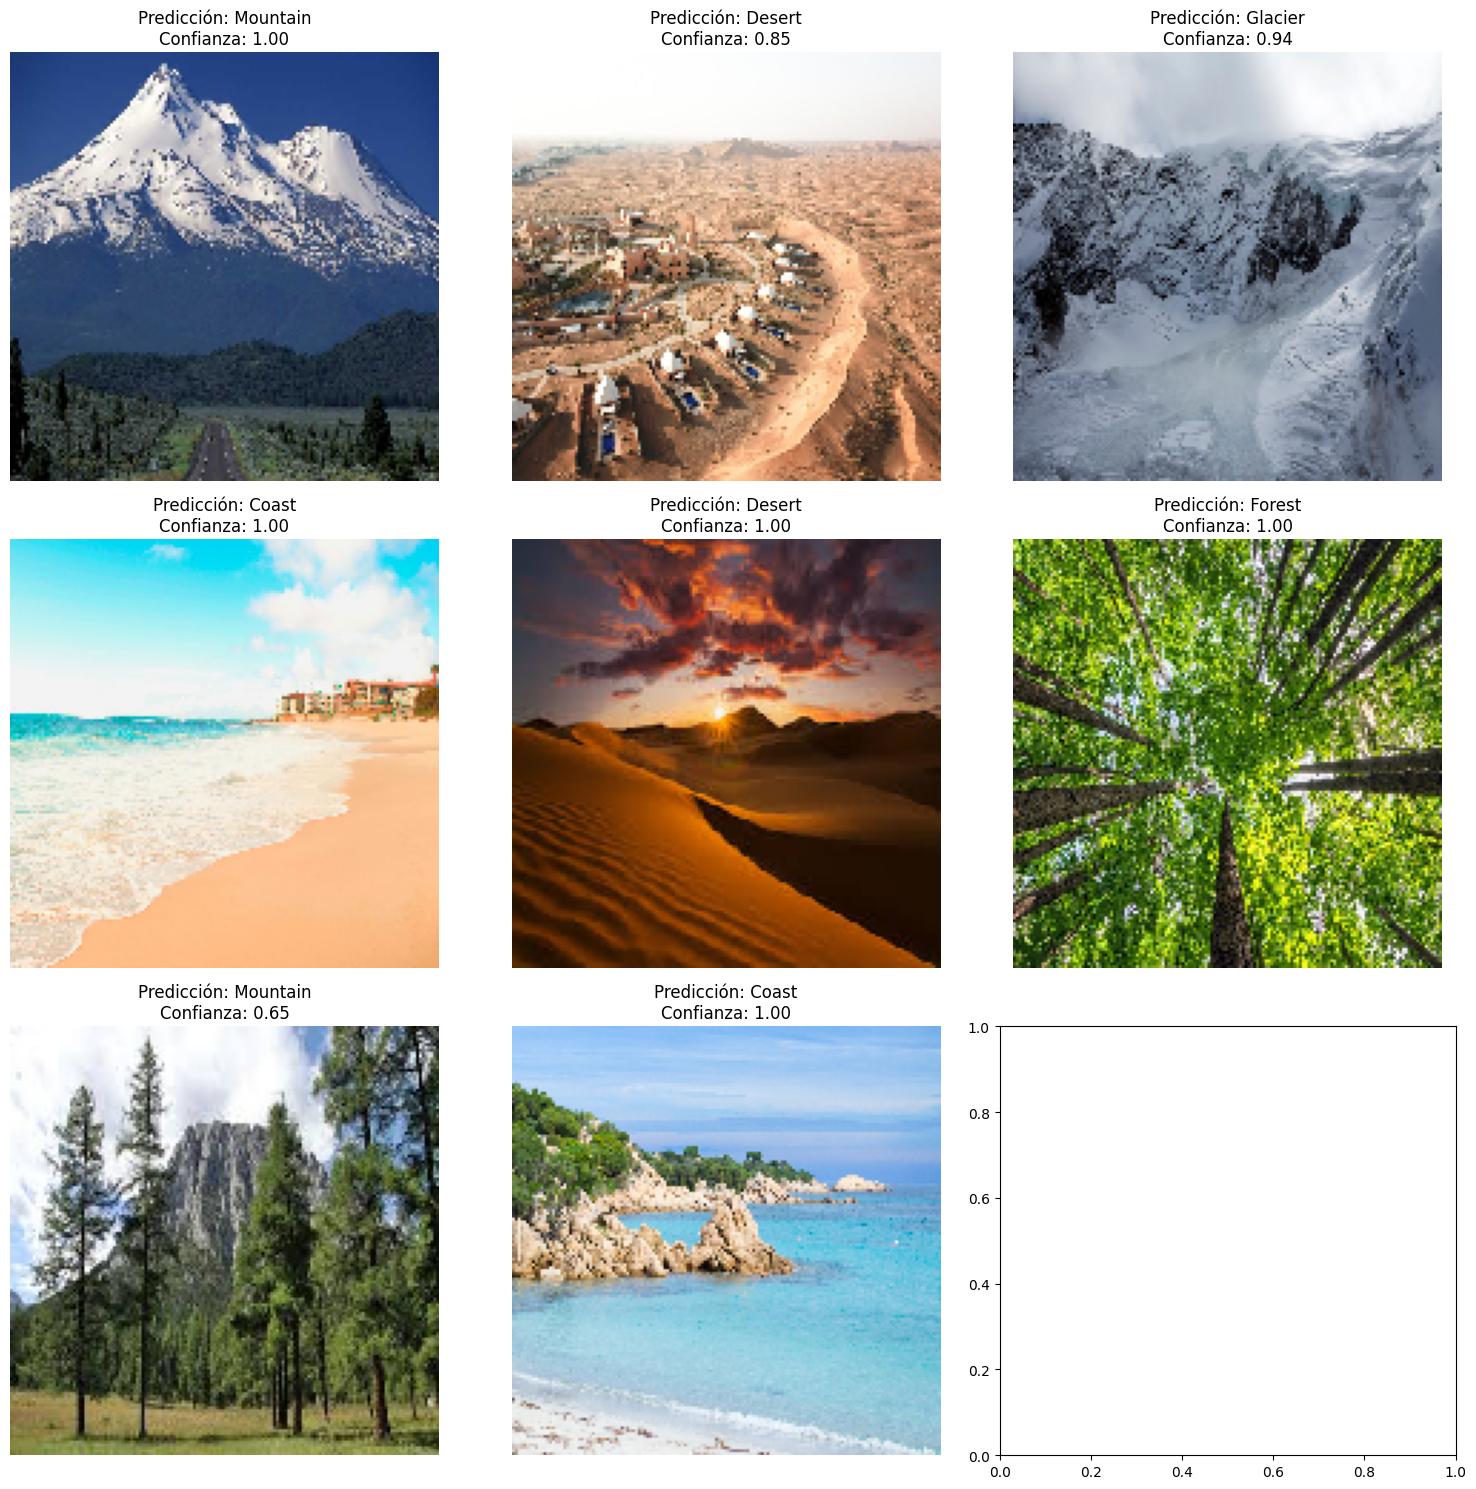

In [6]:
folder_path = '.\\predictions'

# Obtener la lista de nombres de archivos de la carpeta
image_files = os.listdir(folder_path)

# Calcular el número de columnas en la visualización
num_columns = 3

# Calcular el número total de filas necesarias
num_rows = len(image_files) // num_columns
if len(image_files) % num_columns != 0:
    num_rows += 1

# Crear una figura y ejes para la visualización
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

# Iterar sobre cada imagen en la carpeta
for i, image_file in enumerate(image_files):
    row_index = i // num_columns
    col_index = i % num_columns
    
    # Comprobar si el archivo es una imagen
    if image_file.endswith('.jpg') or image_file.endswith('.jpeg') or image_file.endswith('.png'):
        # Construir la ruta completa de la imagen
        img_path = os.path.join(folder_path, image_file)
        
        # Cargar la imagen
        img = image.load_img(img_path, target_size=(150, 150))
        
        # Preprocesar la imagen
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0
        
        # Hacer predicciones
        predictions = model.predict(img_array)
        
        # Interpretar las predicciones
        predicted_class = np.argmax(predictions[0])
        confidence = predictions[0][predicted_class]
        predicted_class_name = class_names[predicted_class]
        
        # Mostrar la imagen junto con la predicción
        axes[row_index, col_index].imshow(img)
        axes[row_index, col_index].axis('off')
        axes[row_index, col_index].set_title("Predicción: {}\nConfianza: {:.2f}".format(predicted_class_name, confidence))

# Ajustar el espacio entre las subplots
plt.tight_layout()
plt.show()

## Predicción a través de un *link*

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


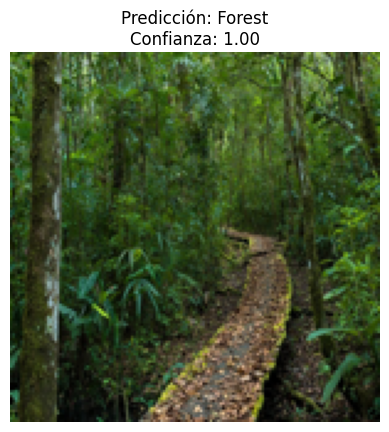

In [13]:
# Link de imagen
image_url = "https://www.mexicodesconocido.com.mx/wp-content/uploads/2018/01/selva-lacandona.jpg"

# Descarga de la imagen
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Preprocesamiento
img = img.resize((150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predicción
predictions = model.predict(img_array)

# Interpretación
predicted_class = np.argmax(predictions[0])
confidence = predictions[0][predicted_class]
predicted_class_name = class_names[predicted_class]

# Mostrar la imagen junto con la predicción
plt.imshow(img)
plt.axis('off')
plt.title("Predicción: {}\nConfianza: {:.2f}".format(predicted_class_name, confidence))
plt.show()